In [2]:
import torch
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
image = plt.imread("piano.png")
image_tensor = torch.tensor(image)
image_tensor.shape

torch.Size([358, 385, 4])

In [4]:
x = image_tensor.shape[0]
y = image_tensor.shape[1]
size = min(x, y)

# crop to square
image_tensor = image_tensor[:size, :size, :3]
image_tensor.shape

torch.Size([358, 358, 3])

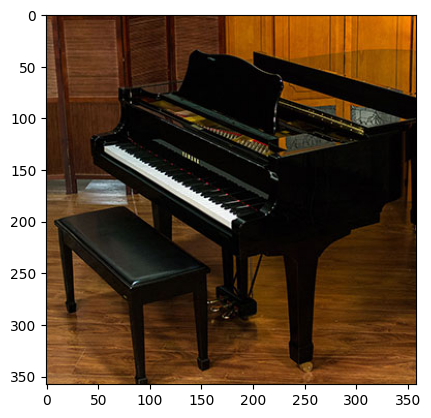

In [5]:
plt.imshow(image_tensor)

In [14]:
model = nn.Sequential(
	nn.Linear(2, 300),
	nn.ReLU(),
	nn.Linear(300, 100),
	nn.ReLU(),
	nn.Linear(100, 3),
	nn.Sigmoid(),
)

In [57]:
X = torch.tensor([[x/size, y/size] for x in range(size) for y in range(size)])
Y = torch.tensor([image_tensor[x,y].tolist() for x in range(size) for y in range(size)])

print(X.shape)
print(Y.shape)


torch.Size([128164, 2])
torch.Size([128164, 3])


In [15]:
def get_image():
	with torch.no_grad():
		output = torch.zeros((size, size, 3))
		for x in range(size):
			for y in range(size):
				output[x, y] = model(torch.tensor([x/size, y/size]))
		return output



In [72]:
epochs = 100
def loss_fn(output, target):
		loss = torch.mean((output - target)**2)
		return loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for n in range(epochs):
    preds = model(X)

    loss = loss_fn(preds, Y)
    print(f"Loss is {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
		

Loss is 0.03346329927444458
Loss is 0.03219040483236313
Loss is 0.0313594676554203
Loss is 0.030883273109793663
Loss is 0.030642013996839523
Loss is 0.03052535280585289
Loss is 0.03045533411204815
Loss is 0.030393874272704124
Loss is 0.030328890308737755
Loss is 0.03026106022298336
Loss is 0.03019734099507332
Loss is 0.03014213778078556
Loss is 0.030086880549788475
Loss is 0.030016319826245308
Loss is 0.029924526810646057
Loss is 0.029818003997206688
Loss is 0.029705746099352837
Loss is 0.02959338203072548
Loss is 0.029481807723641396
Loss is 0.029369449242949486
Loss is 0.029253695160150528
Loss is 0.029132798314094543
Loss is 0.02900785394012928
Loss is 0.02888265997171402
Loss is 0.028761181980371475
Loss is 0.028641818091273308
Loss is 0.02853015996515751
Loss is 0.028424229472875595
Loss is 0.028319744393229485
Loss is 0.028216274455189705
Loss is 0.02811054326593876
Loss is 0.02800152450799942
Loss is 0.027887756004929543
Loss is 0.02776719070971012
Loss is 0.02763916552066803
Lo

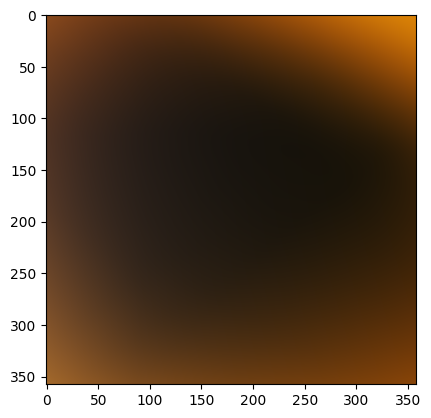

In [73]:
image  = get_image()
plt.imshow(image)